###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Assignment 2: Book Rating Prediction


**Student ID(s):**     1079860


### Recomputing text features

In [2]:
## RUN ALL CELLS IN ORDER FROM TOP TO BOTTOM AND THE CODE SHOULD WORK AS INTENDED ##

# Example computing text features 
# - These features must be trained using a training corpus. Generally, the training corpus should not include validation samples, 
#   but for the purposes of this assignment we have used the entire non-test set (training+validation) as the training corpus, 
#   to allow you to experiment with different validation sets. If you recompute the text features as part of your own model, 
#   you should exclude validation samples and compute them on training samples only. 
#   For example, if you do N-fold cross-validation, this means generating N sets of features for N different training-validation splits.

""" import numpy as np
import pandas as pd

# read text
# for DEMONSTRATION PURPOSES, the entire training set will be used to train the models and also as a test set
x_train_original = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = ',', header=0)
# use recipe name as an example
train_corpus_name = x_train_original['Name']
test_name = x_train_original['Name']

# COUNTVECTORISER FOR NAME FEATURE
from sklearn.feature_extraction.text import CountVectorizer

# preprocess text and compute counts
vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)

# generate counts for a new set of documents
x_train_name = vocab_name.transform(train_corpus_name)
x_test_name = vocab_name.transform(test_name)

# check the number of words in vocabulary
print(len(vocab_name.vocabulary_))
# check the shape of sparse matrix
print(x_train_name.shape)



# DOC2VEC FOR NAME FEATURE
import gensim

# size of the output vector
vec_size = 100

# function to preprocess and tokenize text
def tokenize_corpus(txt, tokens_only=False):
    for i, line in enumerate(txt):
        tokens = gensim.utils.simple_preprocess(line)
        if tokens_only:
            yield tokens
        else:
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

# tokenize a training corpus
corpus_name = list(tokenize_corpus(train_corpus_name))

# train doc2vec on the training corpus
model = gensim.models.doc2vec.Doc2Vec(vector_size=vec_size, min_count=2, epochs=40)
model.build_vocab(corpus_name)
model.train(corpus_name, total_examples=model.corpus_count, epochs=model.epochs)

# tokenize new documents
doc = list(tokenize_corpus(test_name, tokens_only=True))

# generate embeddings for the new documents
x_test_name = np.zeros((len(doc),vec_size))
for i in range(len(doc)):
    x_test_name[i,:] = model.infer_vector(doc[i])
    
# check the shape of doc_emb
print(x_test_name.shape) """



# maybe create own text features using tf idf vectoriser for name, author and description




' import numpy as np\nimport pandas as pd\n\n# read text\n# for DEMONSTRATION PURPOSES, the entire training set will be used to train the models and also as a test set\nx_train_original = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = \',\', header=0)\n# use recipe name as an example\ntrain_corpus_name = x_train_original[\'Name\']\ntest_name = x_train_original[\'Name\']\n\n# COUNTVECTORISER FOR NAME FEATURE\nfrom sklearn.feature_extraction.text import CountVectorizer\n\n# preprocess text and compute counts\nvocab_name = CountVectorizer(stop_words=\'english\').fit(train_corpus_name)\n\n# generate counts for a new set of documents\nx_train_name = vocab_name.transform(train_corpus_name)\nx_test_name = vocab_name.transform(test_name)\n\n# check the number of words in vocabulary\nprint(len(vocab_name.vocabulary_))\n# check the shape of sparse matrix\nprint(x_train_name.shape)\n\n\n\n# DOC2VEC FOR NAME FEATURE\nimport gensim\n\n# size of the output vector\nvec_size = 10

### Importing the Data

In [3]:
import numpy as np
import pandas as pd
import pickle

# Import data
full_train_original = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = ',', header=0)
#print(train_original)
x_train_original = full_train_original.drop("rating_label", axis=1)
#print(x_train_original)
#print(full_train_original)
y_train_original = full_train_original["rating_label"]
#print(y_train_original)

full_test_original = pd.read_csv(r"book_rating_test.csv", index_col = False, delimiter = ',', header=0)
#print(full_test_original)

# Import sparse matrices of bag-of-word representations

import scipy
train_name_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\train_name_vec.npz'))
train_authors_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\train_authors_vec.npz'))
train_desc_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\train_desc_vec.npz'))




# could maybe load in the countvectoriser instead to be able to put the words in as columns and therefore improve interpretability of model / use tf idf vectoriser to trim down to most important words
test_name_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\test_name_vec.npz'))
test_authors_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\test_authors_vec.npz'))
test_desc_vec = pd.DataFrame.sparse.from_spmatrix(scipy.sparse.load_npz('book_text_features_countvec\\test_desc_vec.npz'))

#print(train_name_vec)
#print(train_authors_vec)
#print(train_desc_vec)

#print(test_name_vec)
#print(test_authors_vec)
#print(test_desc_vec)

# Import doc2vec vectors
train_name_doc2vec100 = pd.read_csv(r"book_text_features_doc2vec\\train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
train_authors_doc2vec20 = pd.read_csv(r"book_text_features_doc2vec\\train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
train_desc_doc2vec100 = pd.read_csv(r"book_text_features_doc2vec\\train_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

test_name_doc2vec100 = pd.read_csv(r"book_text_features_doc2vec\\test_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
test_authors_doc2vec20 = pd.read_csv(r"book_text_features_doc2vec\\test_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
test_desc_doc2vec100 = pd.read_csv(r"book_text_features_doc2vec\\test_desc_doc2vec100.csv", index_col = False, delimiter = ',', header=None)

train_name_vec.columns = "name_" + train_name_vec.columns.astype(str)
train_name_doc2vec100.columns = "name_" + train_name_doc2vec100.columns.astype(str)

train_authors_vec.columns = "authors_" + train_authors_vec.columns.astype(str)
train_authors_doc2vec20.columns = "authors_" + train_authors_doc2vec20.columns.astype(str)

train_desc_vec.columns = "desc_" + train_desc_vec.columns.astype(str)
train_desc_doc2vec100.columns = "desc_" + train_desc_doc2vec100.columns.astype(str)


test_name_vec.columns = "name_" + test_name_vec.columns.astype(str)
train_name_doc2vec100.columns = "name_" + test_name_doc2vec100.columns.astype(str)

test_authors_vec.columns = "authors_" + test_authors_vec.columns.astype(str)
test_authors_doc2vec20.columns = "authors_" + test_authors_doc2vec20.columns.astype(str)

test_desc_vec.columns = "desc_" + test_desc_vec.columns.astype(str)
test_desc_doc2vec100.columns = "desc_" + test_desc_doc2vec100.columns.astype(str)



#print(train_name_doc2vec100)
#print(train_authors_doc2vec20)
#print(train_desc_doc2vec100)

#https://www.researchgate.net/post/How_to_combine_the_features_of_two_feature_extraction_techniques_into_single_feature_vector

### Checking class label distribution

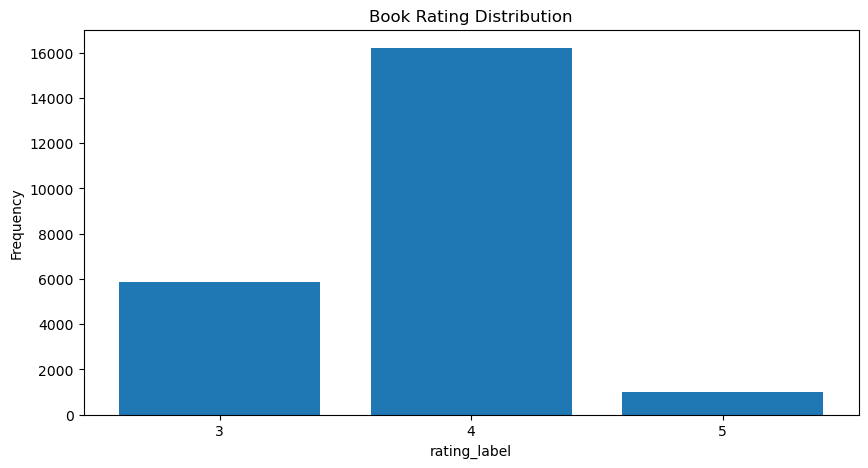

In [4]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot histogram for the train set on the left subplot
#axs.hist(full_train_original["rating_label"].values.flatten(), bins=3, alpha=0.5, color='blue')
#axs.set_xlabel('Label Values')
#axs.set_ylabel('Frequency')
#axs.set_title('Train Set')

labels, counts = np.unique(full_train_original["rating_label"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Book Rating Distribution')
plt.xlabel('rating_label')
plt.ylabel('Frequency')
plt.show()

# Display the plot
#plt.tight_layout()
#plt.show()

### Converting categorical data to numeric data (Publisher and Language)

In [5]:

"""
# Convert categorical data to ordinal numeric data
full_train_numeric = full_train_original

obj_columns = full_train_original.select_dtypes(['object']).columns

full_train_original.dtypes
full_train_numeric[obj_columns] = full_train_numeric[obj_columns].apply(lambda feature: pd.factorize(feature)[0])

#print(full_train_numeric)

full_test_numeric = full_test_original

obj_columns = full_test_original.select_dtypes(['object']).columns

full_test_numeric[obj_columns] = full_test_numeric[obj_columns].apply(lambda feature: pd.factorize(feature)[0])
"""
# Convert (non-ordinal) categorical data to numeric data using one-hot encoding 

full_train_original["Publisher"] = full_train_original["Publisher"].astype("category")
full_train_original["Language"] = full_train_original["Language"].astype("category")



from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")

train_cats = full_train_original.select_dtypes('category')
ohe.fit(train_cats)

codes = ohe.transform(train_cats).toarray()
feature_names = ohe.get_feature_names_out(['Publisher', 'Language'])

full_train_ohe = pd.concat([full_train_original.select_dtypes(exclude='category'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

print(full_train_original)
print(full_train_ohe)

full_test_original["Publisher"] = full_test_original["Publisher"].astype("category")
full_test_original["Language"] = full_test_original["Language"].astype("category")

test_cats = full_test_original.select_dtypes('category')

codes = ohe.transform(test_cats).toarray()
feature_names = ohe.get_feature_names_out(['Publisher', 'Language'])

full_test_ohe = pd.concat([full_test_original.select_dtypes(exclude='category'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

print(full_test_original)
print(full_test_ohe)


#print(full_train_original)
#print(full_train_ohe)
#display(full_train_ohe[:1])

#https://www.kaggle.com/discussions/getting-started/50008 - how to apply encoding to test set as well 


                                                    Name  \
0                     Best of Dr Jean: Reading & Writing   
1                                    Here All Dwell Free   
2                                  Boomer's Big Surprise   
3      I'll Go and Do More: Annie Dodge Wauneka, Nava...   
4                                                     Us   
...                                                  ...   
23058                                 Black Coffee Blues   
23059        America's Champion Swimmer: Gertrude Ederle   
23060                 Crime and Custom in Savage Society   
23061  The Name and Nature of Poetry and Other Select...   
23062                            Redemption (Sevens, #7)   

                      Authors  PublishYear  PublishMonth  PublishDay  \
0             Jean R. Feldman         2005             6           1   
1      Gertrud Mueller Nelson         1991            10           1   
2       Constance W. McGeorge         2005             3       

### Adding extracted text features to the data

In [6]:
# Should probably use countvectorizer/doc2vec for book name and description (author probably is fine unmodified but should still try 
# training with different combinations of the text features and evaluate the different models)

# Book names are generally unique so using countvectorizer or doc2vec will provide some patterns / grouping / more meaning to the book titles for the model to utilise, 
# similarly to the book descriptions. A model will likely not be able to make sense of unmodified book titles and book descriptions and find any signficant relationship between them and a books rating
# so a doc2vec or countvectoriser transformation seems necessary to allow the model to find patterns in the form of how particular concepts / themes (which can be inferred from word counts in the case of countvectoriser) 
# being present within books may be related to higher ratings

# However, in the case of author, it would be reasonable to expect a relationship between an author (more specifically, their name) and the rating / quality of a book, so data transformation seems
# unnecessary. The only potential relationship that could be found through a countvectoriser / doc2vec transformation may be a relationship between particular types of names and a books success / rating


# Convert categorical data into numeric data so models will function 

# Create different forms of training and test data using the transformed text features

from scipy import sparse

# Dataset with book name, author and description replaced by doc2vec vector
full_train_doc2vecNAD = pd.concat([full_train_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), train_name_doc2vec100,  train_authors_doc2vec20, train_desc_doc2vec100], axis=1) 

#print(full_traindoc2vecNAD)

full_test_doc2vecNAD = pd.concat([full_test_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), test_name_doc2vec100,  test_authors_doc2vec20, test_desc_doc2vec100], axis=1)


# Dataset with book name and description replaced by doc2vec vector, and author replaced by countvectoriser transformation
full_train_cvA_doc2vecND = pd.concat([full_train_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), train_name_doc2vec100,  train_authors_vec, train_desc_doc2vec100], axis=1) 

#print(full_train_cvA_doc2vecND)

full_test_cvA_doc2vecND = pd.concat([full_test_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), test_name_doc2vec100,  test_authors_vec, test_desc_doc2vec100], axis=1)


# Dataset with description replaced by doc2vec vector, and author and book name replaced by countvectoriser transformation

full_train_cvNA_doc2vecD = pd.concat([full_train_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), train_name_vec,  train_authors_vec, train_desc_doc2vec100], axis=1)

#print(full_traindoc2vecNAD)

full_test_cvNA_doc2vecD = pd.concat([full_test_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), test_name_vec,  test_authors_vec, test_desc_doc2vec100], axis=1)

# Dataset with book name, author and description replaced by countvectoriser transformation

full_train_cvNAD = pd.concat([full_train_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), train_name_vec,  train_authors_vec, train_desc_vec], axis=1)

#print(full_traindoc2vecNAD)

full_test_cvNAD = pd.concat([full_test_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), test_name_vec,  test_authors_vec, test_desc_vec], axis=1)


# Dataset with only name and description doc2vec vectors

full_train_cvNAD = pd.concat([full_train_ohe.drop(labels=["Name", "Authors", "Description"], axis=1), train_name_vec,  train_authors_vec, train_desc_vec], axis=1)


print(full_train_doc2vecNAD.shape)
print(full_train_cvA_doc2vecND.shape)
print(full_train_cvNA_doc2vecD.shape)
print(full_train_cvNAD.shape)

#print(scipy.sparse.issparse(sparse.csr_matrix(full_train2.to_numpy())))
#print(scipy.sparse.issparse(full_train4))
#print(scipy.sparse.issparse(full_train5))
#print(scipy.sparse.issparse(full_train6))
#print(scipy.sparse.issparse(full_train7))


(23063, 4492)
(23063, 17781)
(23063, 38447)
(23063, 131156)


In [ ]:
# run code above to load in data and apply preprocessing

### Feature selection

In [1]:

# MAY TAKE A WHILE TO COMPLETE (~30 MINUTES)

from math import ceil
from sklearn.model_selection import train_test_split 
import gc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn import svm

import warnings

warnings.simplefilter(action='ignore')

gc.collect()

C=1

datasets = [full_train_doc2vecNAD, full_train_cvA_doc2vecND, full_train_cvNA_doc2vecD, full_train_cvNAD]
dataset_titles = ["doc2vecNAD", "cvA_doc2vecND", "cvNA_doc2vecD", "cvNAD"]

for data, ds_title in zip(datasets, dataset_titles):
    print('\n==================================== DATASET = ', ds_title,'================================') 
    print('\n============================================================================================')              
    X_train = (data[0:199].drop("rating_label", axis=1)).values
    X_valid = (data[200:250].drop("rating_label", axis=1)).values
    y_train = data[0:199]["rating_label"]
    y_valid = data[200:250]["rating_label"]

    #train_test_split(data.drop("rating_label", axis=1).values, data["rating_label"].values, test_size=0.2)
    print('X_train: {} X_valid: {}'.format(X_train.shape, X_valid.shape))



    # Test different models on the full datasets and compare to results after performing feature selection using f-test and MI
    
    models = [DummyClassifier(strategy='most_frequent'),
              DecisionTreeClassifier(max_depth=1),
              BernoulliNB(),
              KNeighborsClassifier(n_neighbors=5),
              KNeighborsClassifier(n_neighbors=21),
              DecisionTreeClassifier(max_depth=None, random_state=27),
              svm.SVC(kernel='linear', class_weight='balanced', C=C),
              LogisticRegression(solver='newton-cg', max_iter=1000),
              LogisticRegression(max_iter=1000)
              ]
              
    titles = ['0R',
              '1R',
              "Bernoulli NB",
              '5-nearest neighbour',
              '21-nearest neighbour',
              'Decision Tree',
              'Linear kernel SMO SVM',
              "Log Regression newton-cg",
              "Log Regression lbfgs",
              "Ridge Classifier"
              ]



    for k in [10,100,1000, ceil(data.shape[1] / 10), ceil(data.shape[1] / 5), ceil(data.shape[1] / 2)]:
        print('\n--------------------------------------- K = ', k,'------------------------------')
        f = SelectKBest(f_classif, k=k)
        f.fit(X_train,y_train)
        X_train_f = f.transform(X_train)
        X_valid_f = f.transform(X_valid)


        #mi = SelectKBest(score_func=mutual_info_classif, k=k)
        #mi.fit(X_train,y_train)
        #X_train_mi = mi.transform(X_train)
        #X_valid_mi = mi.transform(X_valid)


        Xs = [(X_train, X_valid), (X_train_f, X_valid_f)]#, (X_train_mi, X_valid_mi)]
        X_names = ['complete', 'f']#, 'mi']
        for title, model in zip(titles, models):
            print('\n=========',title, '(with k=',k,'features): ')
            for X_name, X in zip(X_names, Xs):
                X_train_t, X_valid_t = X
                model.fit(X_train_t, y_train)
                y_valid_predict = model.predict(X_valid_t)
                accuracy =  accuracy_score(y_valid, y_valid_predict)
                print(X_name, 'accuracy is:',  accuracy)
                print(classification_report(y_valid, y_valid_predict))
print('\n============================================================================================')   


KeyboardInterrupt: 

### Choosing between doc2vec and CV feature extractions

In [8]:
# doc2vecNAD tests
from math import ceil
from sklearn.model_selection import train_test_split 
import gc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

import warnings

warnings.simplefilter(action='ignore')

X1_train, X1_valid, y1_train, y1_valid = train_test_split(full_train_doc2vecNAD.drop("rating_label", axis=1).values, full_train_doc2vecNAD["rating_label"].values, test_size=0.2, random_state=1)

f = SelectKBest(f_classif, k=1000)
f.fit(X1_train,y1_train)
X1_train_f = f.transform(X1_train)
X1_valid_f = f.transform(X1_valid)

#print("=================================== Bernoulli NB") # may not be the best choice of model for this data if the label distribution within the sampled dataset doesn't represent the true label distribution of book rating as NB biases towards the majority label
#model = BernoulliNB()                                     # https://stats.stackexchange.com/questions/104397/naive-bayes-imbalanced-dataset-in-real-time-scenario          
#model.fit(X1_train_f, y1_train)

titles = [ "0R",
            "Bernoulli NB",
            "RBF SVM",
            "Linear SVM C=10",
            "Linear SVM C=1",
            "Linear SVM C=0.1",
            "29 Nearest Neighbours",
            "Decision Tree",
            "Log Regression newton-cholesky",
            "Log Regression lbfgs",
            #"Perceptron",
            "Ridge Classifier",
            #"Passive Aggressive Classifier"
]

models = [ DummyClassifier(),
          BernoulliNB(),
          SVC(kernel='rbf', C=1, gamma='scale'),
          SVC(kernel='linear', C=10),
          SVC(kernel='linear', C=1),
          SVC(kernel='linear', C=0.1),
          KNeighborsClassifier(n_neighbors=29),
          DecisionTreeClassifier(max_depth=None, random_state=27),
          LogisticRegression(solver='newton-cg', max_iter=100),
          LogisticRegression(max_iter=100),
          #Perceptron(),
          RidgeClassifier(solver="auto"),
          #PassiveAggressiveClassifier()
]

print("=================================== doc2vecNAD =================================== ")

for title, model in zip(titles,models):
    print("=================================== ", title)
    model.fit(X1_train_f, y1_train)

    predictions = model.predict(X1_valid_f)
    print("Training accuracy: ", model.score(X1_train_f, y1_train))
    print(classification_report(y1_valid, predictions))



=================================== doc2vecNAD =================================== 
===================================  0R
Training accuracy:  0.7046070460704607
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1200
         4.0       0.70      1.00      0.82      3208
         5.0       0.00      0.00      0.00       205

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.48      0.70      0.57      4613

===================================  Bernoulli NB
Training accuracy:  0.7215176151761518
              precision    recall  f1-score   support

         3.0       0.47      0.26      0.33      1200
         4.0       0.72      0.86      0.79      3208
         5.0       0.20      0.14      0.16       205

    accuracy                           0.67      4613
   macro avg       0.46      0.42      0.43      4613
weighted avg       0.63      0.67      0.

In [11]:
# cvNAD tests
from math import ceil
from sklearn.model_selection import train_test_split 
import gc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

import warnings

gc.collect()

warnings.simplefilter(action='ignore')

import pandas as pd
import scipy
from scipy.sparse import csr_matrix

train_csr = csr_matrix(full_train_cvNAD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo()) # convert to sparse matrix to prevent memory error


X2_train, X2_valid, y2_train, y2_valid = train_test_split(train_csr, full_train_cvNAD["rating_label"].values, test_size=0.2, random_state=1)

#f = SelectKBest(f_classif, k=10000)
#f.fit(X2_train,y2_train)
#X2_train_f = f.transform(X2_train)
#X2_valid_f = f.transform(X2_valid)

chi2 = SelectKBest(chi2, k=10000)
chi2.fit(X2_train, y2_train)
X2_train_f = chi2.transform(X2_train)
X2_valid_f = chi2.transform(X2_valid)

titles = [ "0R", 
            "Bernoulli NB",
            "Multinomial NB",
            "RBF SVM",
            "Linear SVM C=0.1",
            "23 Nearest Neighbours",
            "Decision Tree",
            "Log Regression newton-cholesky",
            "Log Regression lbfgs",
            #"Perceptron",
            "Ridge Classifier",
            #"Passive Aggressive Classifier"
]

models = [ DummyClassifier(),
          BernoulliNB(),
          MultinomialNB(),  
          SVC(kernel='rbf', C=1, gamma='scale'),
          SVC(kernel='linear', C=0.1),
          KNeighborsClassifier(n_neighbors=23),
          DecisionTreeClassifier(max_depth=None, random_state=27),
          LogisticRegression(solver='newton-cg', max_iter=100),
          LogisticRegression(max_iter=100),
          #Perceptron(n_iter=50),
          RidgeClassifier(solver="auto"),
          #PassiveAggressiveClassifier(n_iter=50)
]

print("=================================== cvNAD =================================== ")
for title, model in zip(titles,models):
    print("=================================== ", title)
    model.fit(X2_train_f, y2_train)

    predictions = model.predict(X2_valid_f)
    print("Training accuracy: ", model.score(X2_train_f, y2_train))
    print(classification_report(y2_valid, predictions))



=================================== cvNAD =================================== 
===================================  0R
Training accuracy:  0.7046070460704607
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1200
         4.0       0.70      1.00      0.82      3208
         5.0       0.00      0.00      0.00       205

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.48      0.70      0.57      4613

===================================  Bernoulli NB
Training accuracy:  0.806829268292683
              precision    recall  f1-score   support

         3.0       0.46      0.32      0.37      1200
         4.0       0.74      0.86      0.79      3208
         5.0       0.52      0.12      0.20       205

    accuracy                           0.68      4613
   macro avg       0.57      0.43      0.45      4613
weighted avg       0.65      0.68      0.66    

In [12]:
# cvNA_doc2vecD tests
from math import ceil
from sklearn.model_selection import train_test_split 
import gc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

import warnings

gc.collect()

warnings.simplefilter(action='ignore')

import pandas as pd
import scipy
from scipy.sparse import csr_matrix

train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo()) # convert to sparse matrix to prevent memory error

X3_train, X3_valid, y3_train, y3_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)

f = SelectKBest(f_classif, k=10000)
f.fit(X3_train,y3_train)
X3_train_f = f.transform(X3_train)
X3_valid_f = f.transform(X3_valid)

titles = [ "0R", 
            "Bernoulli NB",
            "RBF SVM",
            "Linear SVM C=0.1",
            "23 Nearest Neighbours",
            "Decision Tree",
            "Log Regression newton-cholesky",
            "Log Regression lbfgs",
            #"Perceptron",
            "Ridge Classifier",
            #"Passive Aggressive Classifier"
]

models = [ DummyClassifier(),
          BernoulliNB(),
          SVC(kernel='rbf', C=1, gamma='scale'),
          SVC(kernel='linear', C=0.1),
          KNeighborsClassifier(n_neighbors=23),
          DecisionTreeClassifier(max_depth=None, random_state=27),
          LogisticRegression(solver='newton-cg', max_iter=100),
          LogisticRegression(max_iter=100),
          #Perceptron(n_iter=50),
          RidgeClassifier(solver="auto"),
          #PassiveAggressiveClassifier(n_iter=50)
]

print("=================================== cvNA_doc2vecD =================================== ")

for title, model in zip(titles,models):
    print("=================================== ", title)
    model.fit(X3_train_f, y3_train)

    predictions = model.predict(X3_valid_f)
    print("Training accuracy: ", model.score(X3_train_f, y3_train))
    print(classification_report(y3_valid, predictions))



=================================== cvNA_doc2vecD =================================== 
===================================  0R
Training accuracy:  0.7046070460704607
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1200
         4.0       0.70      1.00      0.82      3208
         5.0       0.00      0.00      0.00       205

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.48      0.70      0.57      4613

===================================  Bernoulli NB
Training accuracy:  0.8444986449864499
              precision    recall  f1-score   support

         3.0       0.60      0.14      0.23      1200
         4.0       0.72      0.97      0.82      3208
         5.0       0.78      0.03      0.07       205

    accuracy                           0.71      4613
   macro avg       0.70      0.38      0.37      4613
weighted avg       0.69      0.71     

In [13]:
# cvA_doc2vecND tests
from math import ceil
from sklearn.model_selection import train_test_split 
import gc
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

import warnings

gc.collect()

warnings.simplefilter(action='ignore')

import pandas as pd
import scipy
from scipy.sparse import csr_matrix

train_csr = csr_matrix(full_train_cvA_doc2vecND.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo()) # convert to sparse matrix to prevent memory error

X4_train, X4_valid, y4_train, y4_valid = train_test_split(train_csr, full_train_cvA_doc2vecND["rating_label"].values, test_size=0.2, random_state=1)

f = SelectKBest(f_classif, k=5000)
f.fit(X4_train,y4_train)
X4_train_f = f.transform(X4_train)
X4_valid_f = f.transform(X4_valid)

titles = [ "0R", 
            "Bernoulli NB",
            "RBF SVM",
            "Linear SVM C=0.1",
            "23 Nearest Neighbours",
            "Decision Tree",
            "Log Regression newton-cholesky",
            "Log Regression lbfgs",
            #"Perceptron",
            "Ridge Classifier",
            #"Passive Aggressive Classifier"
]

models = [ DummyClassifier(),
          BernoulliNB(),
          SVC(kernel='rbf', C=1, gamma='scale'),
          SVC(kernel='linear', C=0.1),
          KNeighborsClassifier(n_neighbors=23),
          DecisionTreeClassifier(max_depth=None, random_state=27),
          LogisticRegression(solver='newton-cg', max_iter=100),
          LogisticRegression(max_iter=100),
          #Perceptron(n_iter=50),
          RidgeClassifier(solver="auto"),
          #PassiveAggressiveClassifier(n_iter=50)
]

print("=================================== cvA_doc2vecND =================================== ")

for title, model in zip(titles,models):
    print("=================================== ", title)
    model.fit(X4_train_f, y4_train)

    predictions = model.predict(X4_valid_f)
    print("Training accuracy: ", model.score(X4_train_f, y4_train))
    print(classification_report(y4_valid, predictions))



=================================== cvA_doc2vecND =================================== 
===================================  0R
Training accuracy:  0.7046070460704607
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1200
         4.0       0.70      1.00      0.82      3208
         5.0       0.00      0.00      0.00       205

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.48      0.70      0.57      4613

===================================  Bernoulli NB
Training accuracy:  0.8160975609756097
              precision    recall  f1-score   support

         3.0       0.54      0.18      0.27      1200
         4.0       0.72      0.94      0.82      3208
         5.0       0.58      0.03      0.06       205

    accuracy                           0.70      4613
   macro avg       0.61      0.38      0.38      4613
weighted avg       0.67      0.70     

### Log Regression Hyperparameter Tuning

In [17]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import csr_matrix

train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)   

#X_train = (full_train_cvNA_doc2vecD[0:10000].drop("rating_label", axis=1)).values
#X_valid = (full_train_cvNA_doc2vecD[10000:12500].drop("rating_label", axis=1)).values
#y_train = full_train_cvNA_doc2vecD[0:10000]["rating_label"]
#y_valid = full_train_cvNA_doc2vecD[10000:12500]["rating_label"]

f = SelectKBest(f_classif, k=5000)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_valid_f = f.transform(X_valid)

models = [
            LogisticRegression(C=0.01, solver='newton-cg', max_iter=100),
            LogisticRegression(C=0.05, solver='newton-cg', max_iter=100),
            LogisticRegression(C=0.1, solver='newton-cg', max_iter=100),
            LogisticRegression(C=0.5, solver='newton-cg', max_iter=100),
        LogisticRegression(C=1, solver='newton-cg', max_iter=100),
        LogisticRegression(C=2, solver='newton-cg', max_iter=100)
]

titles = [
    "C=0.01",
    "C=0.05",
    "C=0.1",
    "C=0.5",
    "C=1",
    "C=2",
]

for model, title in zip(models, titles):
    print("====================== ", title)
    # fitting the model for grid search 
    model.fit(X_train_f, y_train) 
 
    predictions = model.predict(X_valid_f) 
   
    # print classification report 
    print(classification_report(y_valid, predictions)) 


======================  C=0.01
              precision    recall  f1-score   support

         3.0       0.55      0.08      0.14      1200
         4.0       0.71      0.97      0.82      3208
         5.0       0.61      0.05      0.10       205

    accuracy                           0.70      4613
   macro avg       0.62      0.37      0.35      4613
weighted avg       0.66      0.70      0.61      4613

======================  C=0.05
              precision    recall  f1-score   support

         3.0       0.58      0.12      0.20      1200
         4.0       0.71      0.96      0.82      3208
         5.0       0.57      0.06      0.11       205

    accuracy                           0.70      4613
   macro avg       0.62      0.38      0.38      4613
weighted avg       0.67      0.70      0.63      4613

======================  C=0.1
              precision    recall  f1-score   support

         3.0       0.58      0.15      0.24      1200
         4.0       0.72      0.96    

In [29]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import csr_matrix
 
import gc

gc.collect()

import warnings

warnings.simplefilter(action='ignore')

#https://stats.stackexchange.com/questions/73032/linear-kernel-and-non-linear-kernel-for-support-vector-machine

param_grid = [
  {'solver': ["newton-cg"],  
              'max_iter': [100],
              'C': [0.01, 0.05, 0.1, 0.5, 1]}
 ]



grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 2, n_jobs=-1, scoring="accuracy") 


train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())


# find optimal hyper parameters for log regression trained with selected dataset 
X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)   

f = SelectKBest(f_classif, k=5000)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_valid_f = f.transform(X_valid)

# fitting the model for grid search 
grid.fit(X_train_f, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_valid_f) 
   
# print classification report 
print(classification_report(y_valid, grid_predictions)) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}
              precision    recall  f1-score   support

         3.0       0.50      0.24      0.33      1200
         4.0       0.73      0.90      0.81      3208
         5.0       0.53      0.12      0.20       205

    accuracy                           0.70      4613
   macro avg       0.59      0.42      0.44      4613
weighted avg       0.66      0.70      0.66      4613



In [18]:
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from scipy.sparse import csr_matrix
  

import gc

gc.collect()

import warnings

warnings.simplefilter(action='ignore')

#https://stats.stackexchange.com/questions/73032/linear-kernel-and-non-linear-kernel-for-support-vector-machine

param_grid = [
  {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
 ]

grid = GridSearchCV(RidgeClassifier(), param_grid, refit = True, verbose = 2, n_jobs=-1, scoring="accuracy") 

# try to find optimal hyper parameters for Ridge Classifier trained with selected dataset 
train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1) 

#X_train = (full_train_cvNA_doc2vecD[0:10000].drop("rating_label", axis=1)).values
#X_valid = (full_train_cvNA_doc2vecD.drop("rating_label", axis=1)).values
#y_train = full_train_cvNA_doc2vecD[0:10000]["rating_label"]
#y_valid = full_train_cvNA_doc2vecD["rating_label"]

f = SelectKBest(f_classif, k=5000)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_valid_f = f.transform(X_valid)

# fitting the model for grid search 
grid.fit(X_train_f, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_valid_f) 
   
# print classification report 
print(classification_report(y_valid, grid_predictions))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'alpha': 0.01}
              precision    recall  f1-score   support

         3.0       0.49      0.25      0.33      1200
         4.0       0.73      0.89      0.80      3208
         5.0       0.52      0.17      0.26       205

    accuracy                           0.69      4613
   macro avg       0.58      0.44      0.46      4613
weighted avg       0.66      0.69      0.66      4613



### SVM Hyperparameter Tuning

In [7]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import csr_matrix

train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)   

#X_train = (full_train_cvNA_doc2vecD[0:10000].drop("rating_label", axis=1)).values
#X_valid = (full_train_cvNA_doc2vecD[10000:12500].drop("rating_label", axis=1)).values
#y_train = full_train_cvNA_doc2vecD[0:10000]["rating_label"]
#y_valid = full_train_cvNA_doc2vecD[10000:12500]["rating_label"]

f = SelectKBest(f_classif, k=5000)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_valid_f = f.transform(X_valid)

models = [
            SVC(C=0.1, kernel='linear'),
            SVC(C=0.5, kernel='linear'),
SVC(C=1, kernel='linear'),
SVC(C=2, kernel='linear'),
SVC(C=3, kernel='linear'),
SVC(C=5, kernel='linear')
]

titles = [
    "C=0.1",
    "C=0.5",
    "C=1",
    "C=2",
    "C=3",
    "C=5"
]

for model, title in zip(models, titles):
    print("====================== ", title)
    # fitting the model for grid search 
    model.fit(X_train_f, y_train) 
 
    predictions = model.predict(X_valid_f) 
   
    # print classification report 
    print(classification_report(y_valid, predictions)) 



c:\Users\james\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 0 0 ... 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\james\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


======================  C=0.1
              precision    recall  f1-score   support

         3.0       0.59      0.09      0.16      1200
         4.0       0.71      0.98      0.82      3208
         5.0       1.00      0.04      0.08       205

    accuracy                           0.70      4613
   macro avg       0.77      0.37      0.35      4613
weighted avg       0.69      0.70      0.62      4613

======================  C=0.5
              precision    recall  f1-score   support

         3.0       0.58      0.16      0.25      1200
         4.0       0.72      0.96      0.82      3208
         5.0       0.75      0.09      0.16       205

    accuracy                           0.71      4613
   macro avg       0.68      0.40      0.41      4613
weighted avg       0.69      0.71      0.64      4613

======================  C=1
              precision    recall  f1-score   support

         3.0       0.54      0.17      0.26      1200
         4.0       0.72      0.94      0.

In [28]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from scipy.sparse import csr_matrix


import gc

gc.collect()

import warnings

warnings.simplefilter(action='ignore')

#https://stats.stackexchange.com/questions/73032/linear-kernel-and-non-linear-kernel-for-support-vector-machine

param_grid = [
  {'C': [0.1, 0.5, 1],  
              'kernel': ['linear']},
  {'C': [0.01, 0.1, 0.5, 1, 2, 3, 5], 'gamma': ['auto'], 'kernel': ['rbf']}
 ]

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, n_jobs=-1, scoring="accuracy") 

# find optimal hyper parameters for SVM trained with selected dataset 
train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)    

#X_train = (full_train_cvNA_doc2vecD[0:10000].drop("rating_label", axis=1)).values
#X_valid = (full_train_cvNA_doc2vecD[10000:12500].drop("rating_label", axis=1)).values
#y_train = full_train_cvNA_doc2vecD[0:10000]["rating_label"]
#y_valid = full_train_cvNA_doc2vecD[10000:12500]["rating_label"]

f = SelectKBest(f_classif, k=5000)
f.fit(X_train,y_train)
X_train_f = f.transform(X_train)
X_valid_f = f.transform(X_valid)

# fitting the model for grid search 
grid.fit(X_train_f, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_valid_f) 
   
# print classification report 
print(classification_report(y_valid, grid_predictions)) 


Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 0.5, 'kernel': 'linear'}
              precision    recall  f1-score   support

         3.0       0.58      0.16      0.25      1200
         4.0       0.72      0.96      0.82      3208
         5.0       0.75      0.09      0.16       205

    accuracy                           0.71      4613
   macro avg       0.68      0.40      0.41      4613
weighted avg       0.69      0.71      0.64      4613



### Fitting and evaluating the chosen models on stratified K folds

kNN
________________________________________________________________________________
KNeighborsClassifier(metric='cosine', n_neighbors=29, weights='distance')
Training: Fold  1
training time: 0.005s
validation time: 10.032s
training accuracy:  1.0
validation accuracy:  0.7014957728159549
classification report:
              precision    recall  f1-score   support

         3.0       0.44      0.03      0.05      1173
         4.0       0.71      0.99      0.82      3242
         5.0       0.60      0.03      0.06       198

    accuracy                           0.70      4613
   macro avg       0.58      0.35      0.31      4613
weighted avg       0.63      0.70      0.59      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


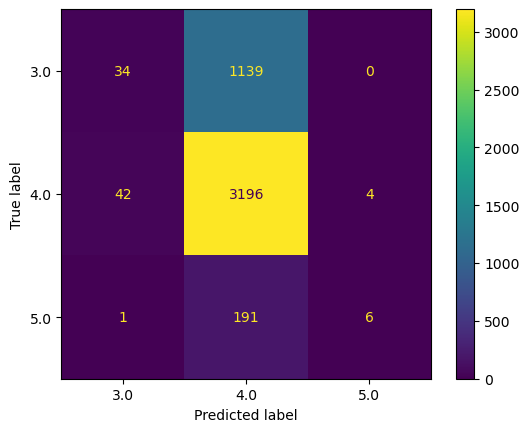

Training: Fold  2
training time: 0.007s
validation time: 10.244s


KeyboardInterrupt: 

In [11]:
# MAY TAKE A COUPLE HOURS TO FULLY RUN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from scipy.sparse import csr_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.dummy import DummyClassifier

import numpy as np

import time

# K fold cross validation benchmarking

full_train_cvNA_doc2vecD.columns = full_train_cvNA_doc2vecD.columns.astype(str)

X_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

#X_train, X_valid, y_train, y_valid = train_test_split(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"], test_size=0.2, random_state=1)

#X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)

f = SelectKBest(f_classif, k=5000)
f.fit(X_csr, full_train_cvNA_doc2vecD["rating_label"])
reduced_X = f.transform(X_csr)

reduced_X.shape

#print(f.get_feature_names_out())

# Benchmark classifiers
def benchmark(clf):
	
	print('_' * 80)
	print(clf)

	
	train_times = []
	valid_times = []
	train_accs = []
	valid_accs = []
	reports = []
	confusion_matrices = []

	kf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
	
	# evaluate each training/validation split combination generated with stratified 5 folds
	for i, (train_index, valid_index) in enumerate(kf.split(reduced_X, full_train_cvNA_doc2vecD["rating_label"])):
		X_train = reduced_X[train_index]
		X_valid =  reduced_X[valid_index]
		y_train = full_train_cvNA_doc2vecD["rating_label"].iloc[train_index]
		y_valid = full_train_cvNA_doc2vecD["rating_label"].iloc[valid_index]

		print("Training: Fold ", i+1)
		t0 = time.time()
		clf.fit(X_train, y_train)
		train_time = time.time() - t0
		train_times.append(train_time)
		print("training time: %0.3fs" % train_time)
	
		t0 = time.time()
		pred = clf.predict(X_valid)
		valid_time = time.time() - t0
		valid_times.append(valid_time)
		print("validation time: %0.3fs" % valid_time)
		
		print("training accuracy: ", clf.score(X_train, y_train))
		train_accs.append(clf.score(X_train, y_train)) 
	
		print("validation accuracy: ", clf.score(X_valid, y_valid))
		valid_accs.append(clf.score(X_valid, y_valid))
	
		print("classification report:")
		print(metrics.classification_report(y_valid, pred))
		reports.append(pd.DataFrame.from_dict(metrics.classification_report(y_valid, pred, output_dict=True)))
	

		print("confusion matrix:")
		plot_confusion_matrix(clf, X_valid, y_valid)  
		plt.show()  
		confusion_matrices.append(pd.DataFrame(confusion_matrix(y_valid, pred)))
		
	
	print("average train time: %0.3fs" % np.mean(train_times))

	print("average validation time:  %0.3fs" % np.mean(valid_times))

	print("average training accuracy: ", np.mean(train_accs))

	print("training accuracy variance: ", np.var(train_accs))

	print("average validation accuracy: ", np.mean(valid_accs))

	print("validation accuracy variance: ", np.var(valid_accs))

	print("averaged classification report:")
	print(pd.concat(reports).groupby(by=pd.concat(reports).index, axis=0).mean().transpose().round(3))

	print("averaged confusion matrix:")
	print(pd.concat(confusion_matrices).groupby(by=pd.concat(confusion_matrices).index, axis=0).mean())
	#ConfusionMatrixDisplay(pd.concat(confusion_matrices).groupby(by=pd.concat(confusion_matrices).index, axis=0).mean())

	#plot_confusion_matrix(clf, X_valid, y_valid)  
	#plt.show()  

	print()
	clf_descr = str(clf).split('(')[0]
	return clf_descr, np.mean(train_times), np.mean(valid_times), np.mean(train_accs), np.mean(valid_accs)


results = []
for clf, name in [
		(DummyClassifier(), "0R"),
		(BernoulliNB(), "Bernoulli NB"),
		(SVC(kernel='linear', C=0.5), "Linear Kernel SVM"),
		(LogisticRegression(C=0.1, solver='newton-cg'), "Logistic Regression"),
	print('=' * 80)
	print(name)
	results.append(benchmark(clf))

### Fitting and evaluating the chosen models on non-stratified K folds

0R
________________________________________________________________________________
DummyClassifier()
Training: Fold  1
training time: 0.002s
validation time: 0.000s
training accuracy:  0.7046070460704607
validation accuracy:  0.6954259700845437
classification report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1200
         4.0       0.70      1.00      0.82      3208
         5.0       0.00      0.00      0.00       205

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.48      0.70      0.57      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metr

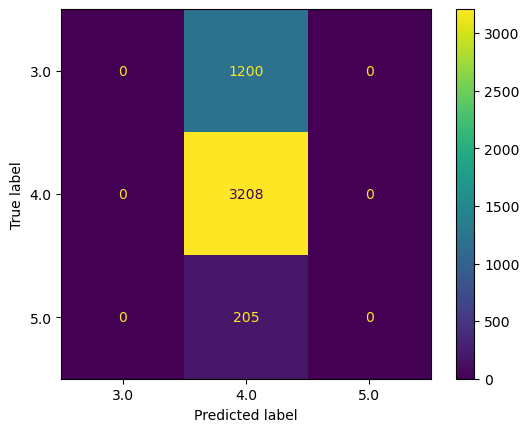

Training: Fold  2
training time: 0.001s
validation time: 0.000s
training accuracy:  0.7033604336043361
validation accuracy:  0.7004118794710601
classification report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1193
         4.0       0.70      1.00      0.82      3231
         5.0       0.00      0.00      0.00       189

    accuracy                           0.70      4613
   macro avg       0.23      0.33      0.27      4613
weighted avg       0.49      0.70      0.58      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metr

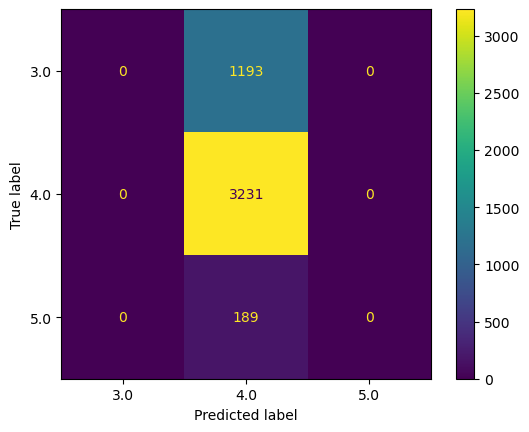

c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metr

Training: Fold  3
training time: 0.001s
validation time: 0.000s
training accuracy:  0.7006504065040651
validation accuracy:  0.7112508129200087
classification report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1137
         4.0       0.71      1.00      0.83      3281
         5.0       0.00      0.00      0.00       195

    accuracy                           0.71      4613
   macro avg       0.24      0.33      0.28      4613
weighted avg       0.51      0.71      0.59      4613

confusion matrix:


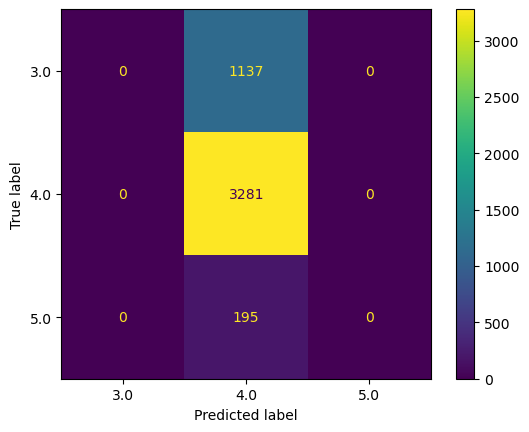

c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metr

Training: Fold  4
training time: 0.001s
validation time: 0.000s
training accuracy:  0.7038100915939516
validation accuracy:  0.6986123156981786
classification report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1196
         4.0       0.70      1.00      0.82      3222
         5.0       0.00      0.00      0.00       194

    accuracy                           0.70      4612
   macro avg       0.23      0.33      0.27      4612
weighted avg       0.49      0.70      0.57      4612

confusion matrix:


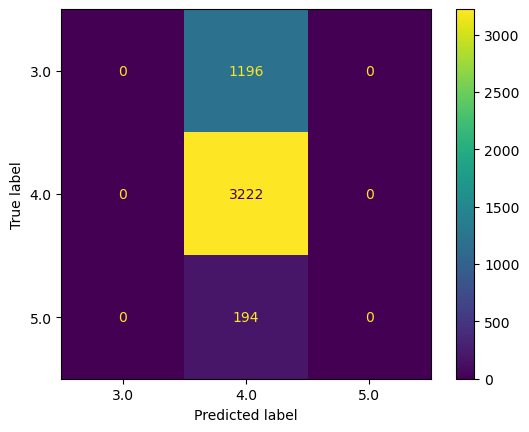

c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\james\anaconda3\lib\site-packages\sklearn\metr

Training: Fold  5
training time: 0.001s
validation time: 0.000s
training accuracy:  0.7014253969974528
validation accuracy:  0.7081526452732003
classification report:
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00      1138
         4.0       0.71      1.00      0.83      3266
         5.0       0.00      0.00      0.00       208

    accuracy                           0.71      4612
   macro avg       0.24      0.33      0.28      4612
weighted avg       0.50      0.71      0.59      4612

confusion matrix:


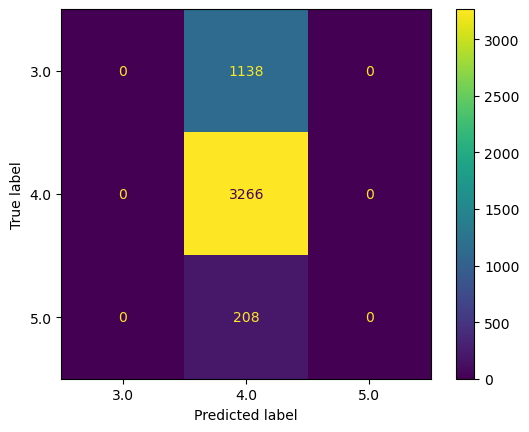

average train time: 0.001s
average validation time:  0.000s
average training accuracy:  0.7027706749540532
training accuracy variance:  2.2211544349173575e-06
average validation accuracy:  0.7027707246893983
validation accuracy variance:  3.553578037543121e-05
averaged classification report:
              f1-score  precision  recall   support
3.0              0.000      0.000   0.000  1172.800
4.0              0.825      0.703   1.000  3241.600
5.0              0.000      0.000   0.000   198.200
accuracy         0.703      0.703   0.703     0.703
macro avg        0.275      0.234   0.333  4612.600
weighted avg     0.580      0.494   0.703  4612.600
averaged confusion matrix:
     0       1    2
0  0.0  1172.8  0.0
1  0.0  3241.6  0.0
2  0.0   198.2  0.0

Bernoulli NB
________________________________________________________________________________
BernoulliNB()
Training: Fold  1
training time: 0.037s
validation time: 0.008s
training accuracy:  0.8136585365853658
validation accuracy:  0.

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


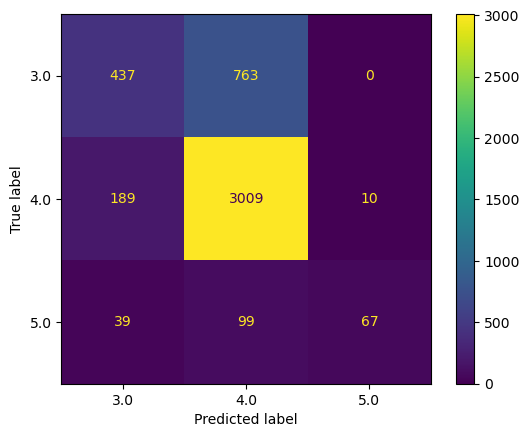

Training: Fold  2
training time: 0.035s
validation time: 0.009s
training accuracy:  0.8143089430894309
validation accuracy:  0.7710817255582051
classification report:
              precision    recall  f1-score   support

         3.0       0.67      0.36      0.47      1193
         4.0       0.78      0.94      0.86      3231
         5.0       0.94      0.43      0.59       189

    accuracy                           0.77      4613
   macro avg       0.80      0.58      0.64      4613
weighted avg       0.76      0.77      0.74      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


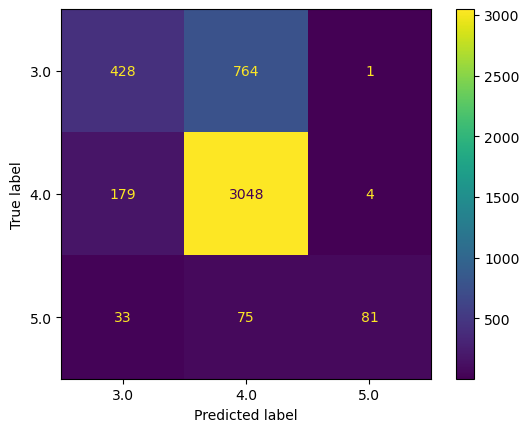

Training: Fold  3
training time: 0.038s
validation time: 0.010s
training accuracy:  0.8086178861788618
validation accuracy:  0.7769347496206374
classification report:
              precision    recall  f1-score   support

         3.0       0.67      0.38      0.48      1137
         4.0       0.79      0.94      0.86      3281
         5.0       0.86      0.32      0.47       195

    accuracy                           0.78      4613
   macro avg       0.77      0.55      0.60      4613
weighted avg       0.77      0.78      0.75      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


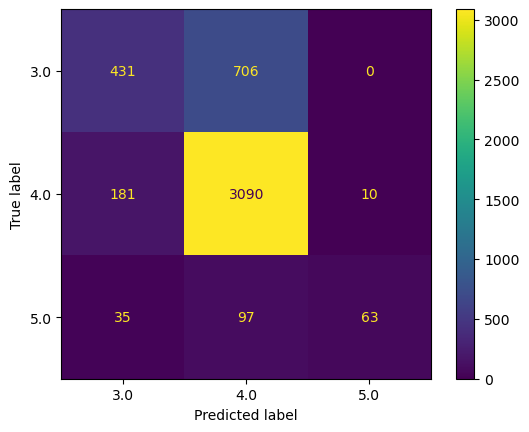

Training: Fold  4
training time: 0.035s
validation time: 0.009s
training accuracy:  0.8111213484363992
validation accuracy:  0.7803555941023417
classification report:
              precision    recall  f1-score   support

         3.0       0.68      0.40      0.51      1196
         4.0       0.79      0.94      0.86      3222
         5.0       0.96      0.39      0.56       194

    accuracy                           0.78      4612
   macro avg       0.81      0.58      0.64      4612
weighted avg       0.77      0.78      0.76      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


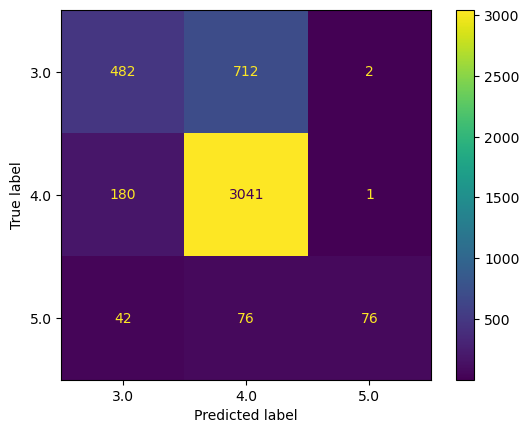

Training: Fold  5
training time: 0.035s
validation time: 0.008s
training accuracy:  0.8083030730041733
validation accuracy:  0.7864267129228101
classification report:
              precision    recall  f1-score   support

         3.0       0.69      0.40      0.50      1138
         4.0       0.80      0.95      0.87      3266
         5.0       0.92      0.41      0.57       208

    accuracy                           0.79      4612
   macro avg       0.81      0.58      0.65      4612
weighted avg       0.78      0.79      0.76      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


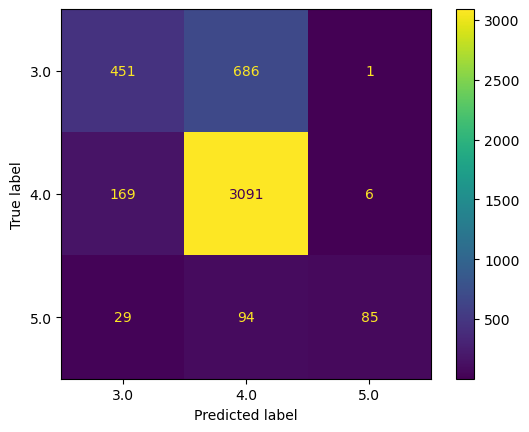

average train time: 0.036s
average validation time:  0.009s
average training accuracy:  0.8112019574588463
training accuracy variance:  6.155118797919281e-06
average validation accuracy:  0.7752684492654249
validation accuracy variance:  7.181326397401575e-05
averaged classification report:
              f1-score  precision  recall   support
3.0              0.486      0.674   0.380  1172.800
4.0              0.859      0.790   0.943  3241.600
5.0              0.532      0.912   0.376   198.200
accuracy         0.775      0.775   0.775     0.775
macro avg        0.626      0.792   0.566  4612.600
weighted avg     0.750      0.766   0.775  4612.600
averaged confusion matrix:
       0       1     2
0  445.8   726.2   0.8
1  179.6  3055.8   6.2
2   35.6    88.2  74.4

Linear Kernel SVM
________________________________________________________________________________
SVC(C=0.5, kernel='linear')
Training: Fold  1
training time: 877.851s
validation time: 4.161s
training accuracy:  0.767804878

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


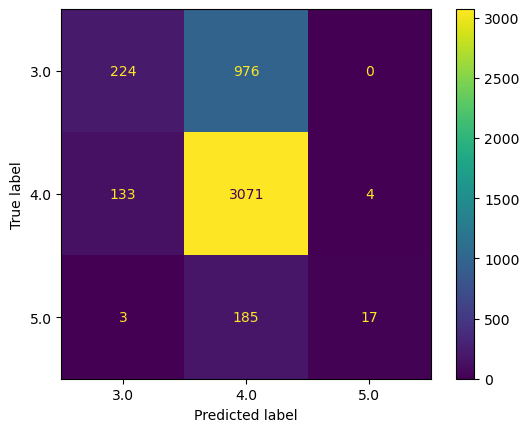

Training: Fold  2
training time: 798.201s
validation time: 4.181s
training accuracy:  0.7654742547425474
validation accuracy:  0.7262085410795578
classification report:
              precision    recall  f1-score   support

         3.0       0.67      0.17      0.28      1193
         4.0       0.73      0.97      0.83      3231
         5.0       0.71      0.11      0.18       189

    accuracy                           0.73      4613
   macro avg       0.70      0.42      0.43      4613
weighted avg       0.71      0.73      0.66      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


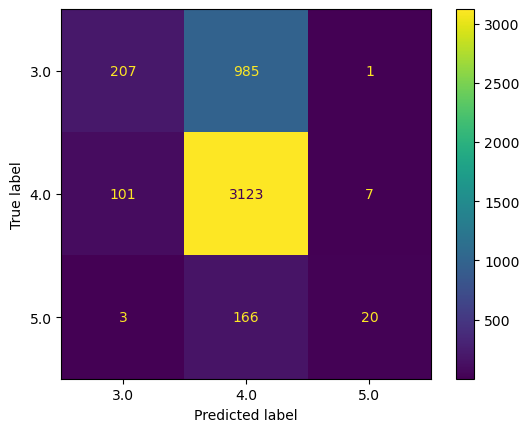

Training: Fold  3
training time: 2063.367s
validation time: 4.168s
training accuracy:  0.7668834688346884
validation accuracy:  0.7446347279427704
classification report:
              precision    recall  f1-score   support

         3.0       0.68      0.22      0.33      1137
         4.0       0.75      0.96      0.84      3281
         5.0       0.90      0.10      0.18       195

    accuracy                           0.74      4613
   macro avg       0.78      0.43      0.45      4613
weighted avg       0.74      0.74      0.69      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


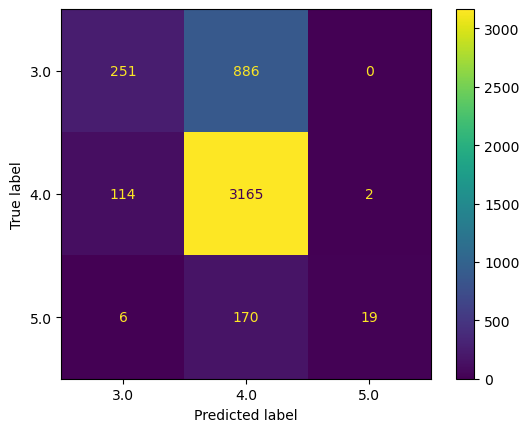

Training: Fold  4
training time: 1238.552s
validation time: 4.130s
training accuracy:  0.7689014145574765
validation accuracy:  0.7248482220294883
classification report:
              precision    recall  f1-score   support

         3.0       0.65      0.20      0.31      1196
         4.0       0.73      0.96      0.83      3222
         5.0       0.58      0.06      0.10       194

    accuracy                           0.72      4612
   macro avg       0.65      0.41      0.41      4612
weighted avg       0.70      0.72      0.67      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


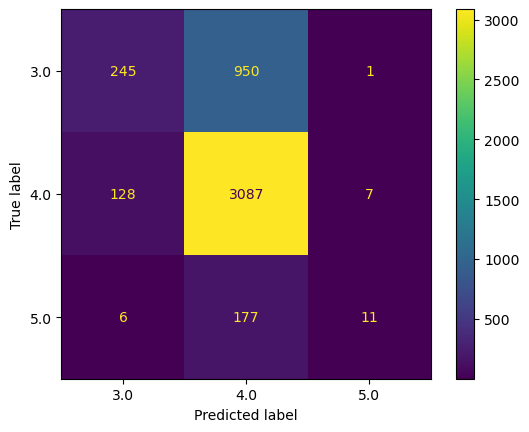

Training: Fold  5
training time: 2009.616s
validation time: 4.124s
training accuracy:  0.7652701750582624
validation accuracy:  0.7352558542931483
classification report:
              precision    recall  f1-score   support

         3.0       0.64      0.21      0.31      1138
         4.0       0.74      0.96      0.84      3266
         5.0       0.71      0.12      0.20       208

    accuracy                           0.74      4612
   macro avg       0.70      0.43      0.45      4612
weighted avg       0.72      0.74      0.68      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


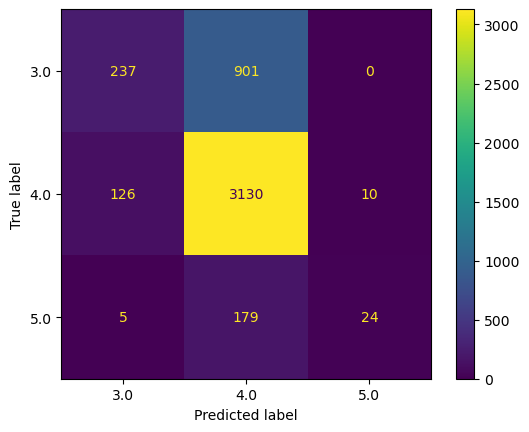

average train time: 1397.517s
average validation time:  4.153s
average training accuracy:  0.766866838248351
training accuracy variance:  1.9016636328933222e-06
average validation accuracy:  0.7297836594006644
validation accuracy variance:  8.543584620870926e-05
averaged classification report:
              f1-score  precision  recall  support
3.0              0.304      0.651   0.199  1172.80
4.0              0.834      0.736   0.961  3241.60
5.0              0.162      0.743   0.092   198.20
accuracy         0.730      0.730   0.730     0.73
macro avg        0.434      0.710   0.417  4612.60
weighted avg     0.670      0.715   0.730  4612.60
averaged confusion matrix:
       0       1     2
0  232.8   939.6   0.4
1  120.4  3115.2   6.0
2    4.6   175.4  18.2

Logistic Regression
________________________________________________________________________________
LogisticRegression(C=0.1, solver='newton-cg')
Training: Fold  1
training time: 71.536s
validation time: 0.002s
training accurac

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


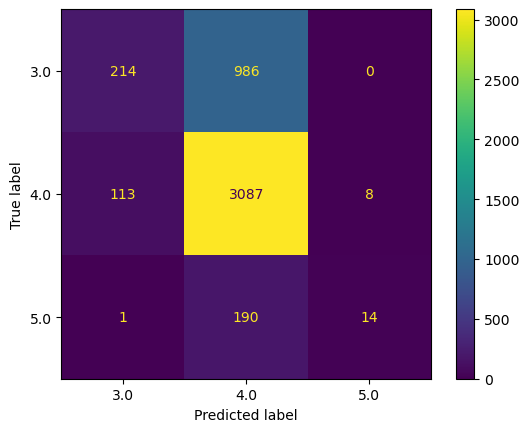

Training: Fold  2
training time: 61.909s
validation time: 0.002s
training accuracy:  0.7555013550135501
validation accuracy:  0.7305441144591373
classification report:
              precision    recall  f1-score   support

         3.0       0.70      0.18      0.29      1193
         4.0       0.73      0.97      0.83      3231
         5.0       0.83      0.08      0.14       189

    accuracy                           0.73      4613
   macro avg       0.75      0.41      0.42      4613
weighted avg       0.73      0.73      0.67      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


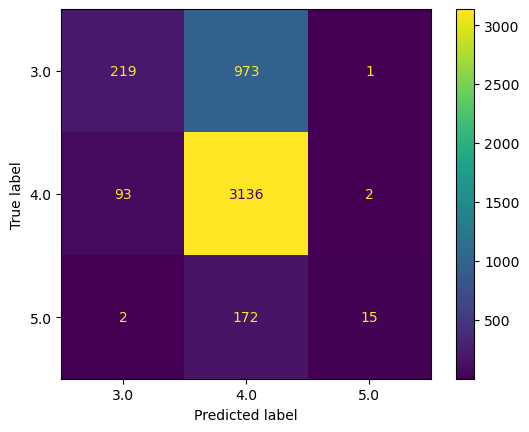

Training: Fold  3
training time: 64.735s
validation time: 0.002s
training accuracy:  0.7531707317073171
validation accuracy:  0.7442011706048125
classification report:
              precision    recall  f1-score   support

         3.0       0.71      0.21      0.33      1137
         4.0       0.75      0.97      0.84      3281
         5.0       0.67      0.05      0.10       195

    accuracy                           0.74      4613
   macro avg       0.71      0.41      0.42      4613
weighted avg       0.73      0.74      0.69      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


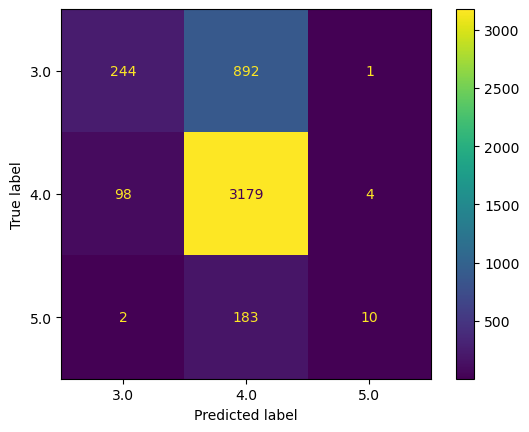

Training: Fold  4
training time: 67.948s
validation time: 0.003s
training accuracy:  0.75714053438838
validation accuracy:  0.7270164787510841
classification report:
              precision    recall  f1-score   support

         3.0       0.68      0.20      0.31      1196
         4.0       0.73      0.97      0.83      3222
         5.0       0.57      0.02      0.04       194

    accuracy                           0.73      4612
   macro avg       0.66      0.39      0.39      4612
weighted avg       0.71      0.73      0.66      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


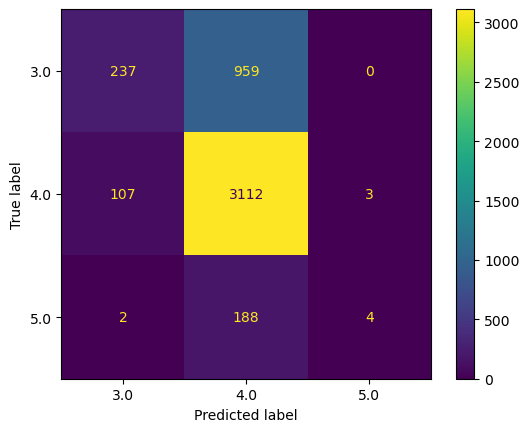

Training: Fold  5
training time: 74.275s
validation time: 0.001s
training accuracy:  0.7547558397918812
validation accuracy:  0.7387250650477016
classification report:
              precision    recall  f1-score   support

         3.0       0.67      0.20      0.31      1138
         4.0       0.74      0.97      0.84      3266
         5.0       0.82      0.09      0.16       208

    accuracy                           0.74      4612
   macro avg       0.75      0.42      0.44      4612
weighted avg       0.73      0.74      0.68      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


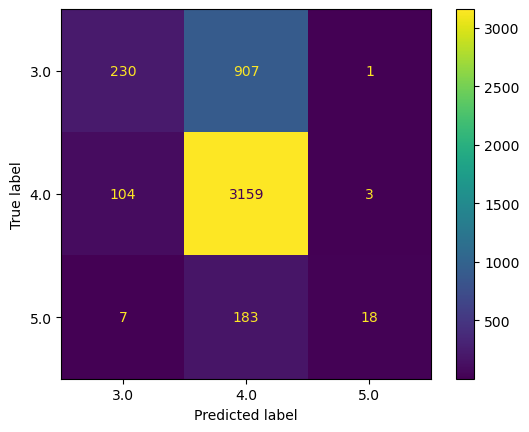

average train time: 68.081s
average validation time:  0.002s
average training accuracy:  0.7553115241585454
training accuracy variance:  1.7464563591307195e-06
average validation accuracy:  0.7318216233056057
validation accuracy variance:  7.997620065587083e-05
averaged classification report:
              f1-score  precision  recall   support
3.0              0.304      0.684   0.195  1172.800
4.0              0.836      0.736   0.967  3241.600
5.0              0.112      0.705   0.061   198.200
accuracy         0.732      0.732   0.732     0.732
macro avg        0.417      0.708   0.408  4612.600
weighted avg     0.669      0.721   0.732  4612.600
averaged confusion matrix:
       0       1     2
0  228.8   943.4   0.6
1  103.0  3134.6   4.0
2    2.8   183.2  12.2

kNN
________________________________________________________________________________
KNeighborsClassifier(n_neighbors=29, weights='distance')
Training: Fold  1
training time: 0.006s
validation time: 9.492s
training accurac

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


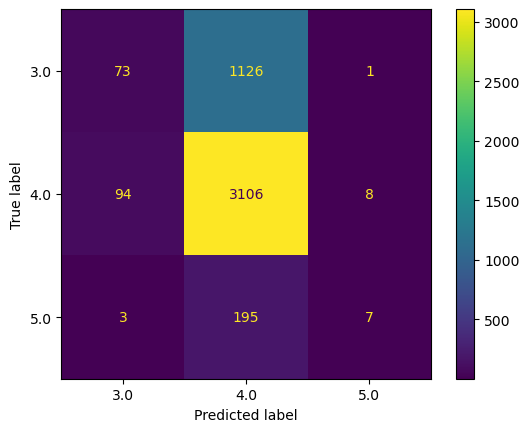

Training: Fold  2
training time: 0.008s
validation time: 9.516s
training accuracy:  1.0
validation accuracy:  0.7019293301539129
classification report:
              precision    recall  f1-score   support

         3.0       0.50      0.04      0.08      1193
         4.0       0.71      0.98      0.82      3231
         5.0       0.64      0.05      0.09       189

    accuracy                           0.70      4613
   macro avg       0.62      0.36      0.33      4613
weighted avg       0.65      0.70      0.60      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


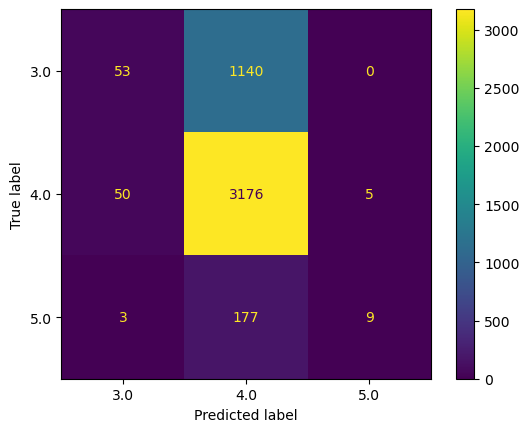

Training: Fold  3
training time: 0.008s
validation time: 9.551s
training accuracy:  1.0
validation accuracy:  0.700845436809018
classification report:
              precision    recall  f1-score   support

         3.0       0.33      0.04      0.08      1137
         4.0       0.71      0.97      0.82      3281
         5.0       0.38      0.03      0.05       195

    accuracy                           0.70      4613
   macro avg       0.48      0.35      0.32      4613
weighted avg       0.61      0.70      0.61      4613

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


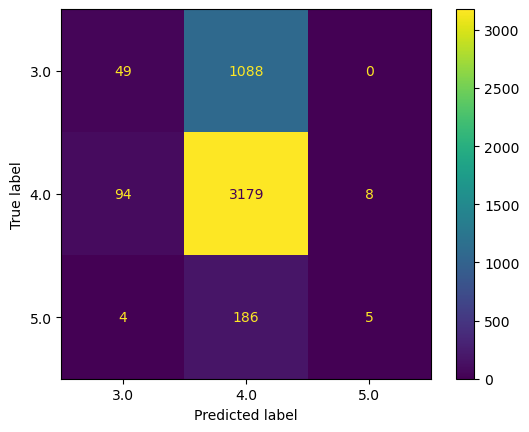

Training: Fold  4
training time: 0.007s
validation time: 9.778s
training accuracy:  1.0
validation accuracy:  0.6938421509106678
classification report:
              precision    recall  f1-score   support

         3.0       0.36      0.03      0.05      1196
         4.0       0.70      0.98      0.82      3222
         5.0       0.75      0.02      0.03       194

    accuracy                           0.69      4612
   macro avg       0.60      0.34      0.30      4612
weighted avg       0.61      0.69      0.59      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


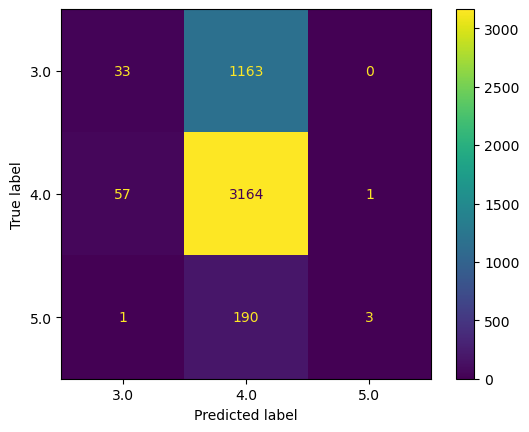

Training: Fold  5
training time: 0.010s
validation time: 10.151s
training accuracy:  1.0
validation accuracy:  0.7088031222896791
classification report:
              precision    recall  f1-score   support

         3.0       0.47      0.05      0.09      1138
         4.0       0.72      0.98      0.83      3266
         5.0       0.64      0.03      0.06       208

    accuracy                           0.71      4612
   macro avg       0.61      0.36      0.33      4612
weighted avg       0.65      0.71      0.61      4612

confusion matrix:


c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


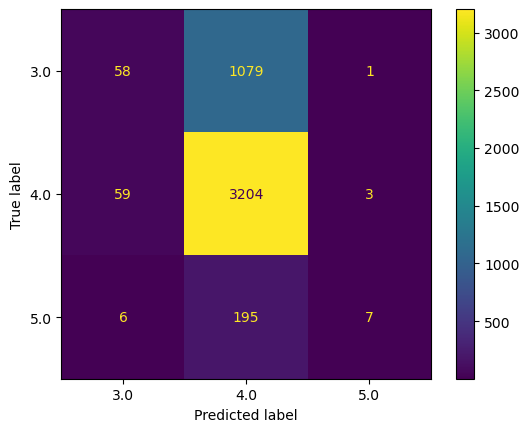

average train time: 0.008s
average validation time:  9.698s
average training accuracy:  1.0
training accuracy variance:  0.0
average validation accuracy:  0.6992153759060569
validation accuracy variance:  4.0813524292963526e-05
averaged classification report:
              f1-score  precision  recall   support
3.0              0.082      0.419   0.045  1172.800
4.0              0.821      0.708   0.977  3241.600
5.0              0.059      0.570   0.031   198.200
accuracy         0.699      0.699   0.699     0.699
macro avg        0.320      0.566   0.351  4612.600
weighted avg     0.600      0.629   0.699  4612.600
averaged confusion matrix:
      0       1    2
0  53.2  1119.2  0.4
1  70.8  3165.8  5.0
2   3.4   188.6  6.2



In [67]:
# SVM model takes 20+ minutes to train

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from scipy.sparse import csr_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.dummy import DummyClassifier

import numpy as np

import time

# K fold cross validation benchmarking

full_train_cvNA_doc2vecD.columns = full_train_cvNA_doc2vecD.columns.astype(str)

X_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

#X_train, X_valid, y_train, y_valid = train_test_split(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"], test_size=0.2, random_state=1)

#X_train, X_valid, y_train, y_valid = train_test_split(train_csr, full_train_cvNA_doc2vecD["rating_label"].values, test_size=0.2, random_state=1)

f = SelectKBest(f_classif, k=5000)
f.fit(X_csr, full_train_cvNA_doc2vecD["rating_label"])
reduced_X = f.transform(X_csr)

#print(f.get_feature_names_out())

# Benchmark classifiers
def benchmark(clf):
	
	print('_' * 80)
	print(clf)

	
	train_times = []
	valid_times = []
	train_accs = []
	valid_accs = []
	reports = []
	confusion_matrices = []

	kf = KFold(n_splits = 5, shuffle=True, random_state = 1)
	
	# evaluate each training/validation split combination generated with stratified 5 folds
	for i, (train_index, valid_index) in enumerate(kf.split(reduced_X, full_train_cvNA_doc2vecD["rating_label"])):
		X_train = reduced_X[train_index]
		X_valid =  reduced_X[valid_index]
		y_train = full_train_cvNA_doc2vecD["rating_label"].iloc[train_index]
		y_valid = full_train_cvNA_doc2vecD["rating_label"].iloc[valid_index]

		print("Training: Fold ", i+1)
		t0 = time.time()
		clf.fit(X_train, y_train)
		train_time = time.time() - t0
		train_times.append(train_time)
		print("training time: %0.3fs" % train_time)
	
		t0 = time.time()
		pred = clf.predict(X_valid)
		valid_time = time.time() - t0
		valid_times.append(valid_time)
		print("validation time: %0.3fs" % valid_time)
		
		print("training accuracy: ", clf.score(X_train, y_train))
		train_accs.append(clf.score(X_train, y_train)) 
	
		print("validation accuracy: ", clf.score(X_valid, y_valid))
		valid_accs.append(clf.score(X_valid, y_valid))
	
		print("classification report:")
		print(metrics.classification_report(y_valid, pred))
		reports.append(pd.DataFrame.from_dict(metrics.classification_report(y_valid, pred, output_dict=True)))
	

		print("confusion matrix:")
		plot_confusion_matrix(clf, X_valid, y_valid)  
		plt.show()  
		confusion_matrices.append(pd.DataFrame(confusion_matrix(y_valid, pred)))
		
	
	print("average train time: %0.3fs" % np.mean(train_times))

	print("average validation time:  %0.3fs" % np.mean(valid_times))

	print("average training accuracy: ", np.mean(train_accs))

	print("training accuracy variance: ", np.var(train_accs))

	print("average validation accuracy: ", np.mean(valid_accs))

	print("validation accuracy variance: ", np.var(valid_accs))

	print("averaged classification report:")
	print(pd.concat(reports).groupby(by=pd.concat(reports).index, axis=0).mean().transpose().round(3))

	print("averaged confusion matrix:")
	print(pd.concat(confusion_matrices).groupby(by=pd.concat(confusion_matrices).index, axis=0).mean())
	#ConfusionMatrixDisplay(pd.concat(confusion_matrices).groupby(by=pd.concat(confusion_matrices).index, axis=0).mean())

	#plot_confusion_matrix(clf, X_valid, y_valid)  
	#plt.show()  

	print()
	clf_descr = str(clf).split('(')[0]
	return clf_descr, np.mean(train_times), np.mean(valid_times), np.mean(train_accs), np.mean(valid_accs)


results = []
for clf, name in [
		(DummyClassifier(), "0R"),
		(BernoulliNB(), "Bernoulli NB"),
		(SVC(kernel='linear', C=0.5), "Linear Kernel SVM"),
		(LogisticRegression(C=0.1, solver='newton-cg'), "Logistic Regression"),
		(KNeighborsClassifier(n_neighbors=29, weights='distance'), "kNN")]:
	print('=' * 80)
	print(name)
	results.append(benchmark(clf))

### Model Interpretation (which features best predict the class label)

In [17]:
import pickle


vocab_name = pickle.load(open("book_text_features_countvec\\train_name_countvectorizer.pkl", "rb"))

vocab_authors = pickle.load(open("book_text_features_countvec\\train_authors_countvectorizer.pkl", "rb"))

vocab_desc = pickle.load(open("book_text_features_countvec\\train_desc_countvectorizer.pkl", "rb"))

vocab_dict_name = vocab_name.vocabulary_

vocab_dict_authors = vocab_authors.vocabulary_

vocab_dict_desc = vocab_desc.vocabulary_

print(vocab_dict_name)

#print(get_swap_dict(vocab_dict_name))



def compare_feature_sets(feature_set):

    #print([s for s in features_5000 if "Publisher" in s])

    print()

    print("original publisher features: ", len([s for s in full_train_ohe if "Publisher" in s]))

    print("publisher features in reduced set: ", len([s for s in feature_set if "Publisher" in s]))

    print("percentage of features retained: ",  round(len([s for s in feature_set if "Publisher" in s]) / len([s for s in full_train_ohe if "Publisher" in s]), 3) * 100, "%")

    #print([s for s in features_5000 if "Language" in s])

    print()

    print("original language features: ", len([s for s in full_train_ohe if "Language" in s]))

    print("language features in reduced set: ", len([s for s in feature_set if "Language" in s]))

    print("percentage of features retained: ",  round(len([s for s in feature_set if "Language" in s]) / len([s for s in full_train_ohe if "Language" in s]), 3) * 100, "%")

    #print([s for s in features_5000 if "name" in s])

    print()

    print("original name features: ", len(train_name_vec.columns))

    print("name features in reduced set: ", len([s for s in feature_set if "name" in s]))

    print("percentage of features retained: ",  round(len([s for s in feature_set if "name" in s]) / len(train_name_vec.columns), 3) * 100, "%")

    print([s for s in vocab_dict_name.keys() if any(s in sub for sub in feature_set)])

    #print([s for s in features_5000 if "authors" in s])

    print()

    print("original author features: ", len(train_authors_vec.columns))

    print("author features in reduced set: ", len([s for s in feature_set if "authors" in s]))

    print("percentage of features retained: ",  round(len([s for s in feature_set if "authors" in s]) / len(train_authors_vec.columns) * 100, 1), "%")

    print([s for s in vocab_dict_authors.keys() if any(s in sub for sub in feature_set)]) 
    #print([s for s in features_5000 if "desc" in s])

    print()

    print("original description features: ", len(train_desc_doc2vec100.columns))

    print("description features in reduced set: ", len([s for s in feature_set if "desc" in s]))

    print("percentage of features retained: ",  round(len([s for s in feature_set if "desc" in s]) / len(train_desc_doc2vec100.columns), 3) * 100, "%")

    return

# find proportion of 5000 features

from sklearn.feature_selection import SelectKBest, f_classif

full_train_cvNA_doc2vecD.columns = full_train_cvNA_doc2vecD.columns.astype(str)

f = SelectKBest(f_classif, k=5000)
f.fit(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"])

features_5000 = f.get_feature_names_out()



# find top 10 features and proportions 

compare_feature_sets(features_5000)

f = SelectKBest(f_classif, k=50)
f.fit(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"])

features_50 = f.get_feature_names_out()

compare_feature_sets(features_50)

# check highest weighted features for naive bayes and log regression (and SVM if thats how that model works too lol) to see which features the model is using



{'best': 2164, 'dr': 5804, 'jean': 9941, 'reading': 15269, 'writing': 20488, 'dwell': 5979, 'free': 7522, 'boomer': 2544, 'big': 2216, 'surprise': 18114, 'll': 11026, 'annie': 1163, 'dodge': 5689, 'wauneka': 20103, 'navajo': 12760, 'leader': 10702, 'activist': 652, 'castles': 3285, 'britain': 2763, 'ireland': 9786, 'ultimate': 19358, 'reference': 15407, 'book': 2530, '350': 393, 'gazetteer': 7807, 'entries': 6426, 'cities': 3785, 'ladies': 10534, 'beguine': 2060, 'communities': 4137, 'medieval': 11865, 'low': 11166, 'countries': 4577, '1200': 37, '1565': 94, 'tangi': 18332, 'crystal': 4783, 'snow': 17268, 'fairy': 6881, 'rainbow': 15157, 'magic': 11338, 'weather': 20126, 'fairies': 6878, 'road': 15860, 'al': 861, 'qaeda': 14998, 'story': 17828, 'bin': 2238, 'laden': 10533, 'right': 15801, 'hand': 8484, 'man': 11457, 'gay': 7803, 'lesbian': 10795, 'guide': 8335, 'college': 4025, 'life': 10879, 'mummy': 12566, 'tomb': 18841, 'comprehension': 4186, 'activities': 654, 'social': 17287, 'stu

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



original publisher features:  4248
publisher features in reduced set:  691
percentage of features retained:  16.3 %

original language features:  25
language features in reduced set:  10
percentage of features retained:  40.0 %

original name features:  20766
name features in reduced set:  2653
percentage of features retained:  12.8 %
['dr', 'free', 'll', 'book', '350', 'low', '1200', '1565', 'road', 'al', 'bin', 'man', 'science', 'press', 'roman', 'ad', '1400', '1500', 'human', '1865', 'night', 'ship', 'ride', 'hit', 'field', 'old', 'power', '200', 'act', 'star', 'ate', 'king', 'le', 'race', 'omen', 'age', '11', '1944', 'rise', '25', 'thor', 'odin', 'el', 'del', 'art', '1350', '1750', '1947', '1972', '1919', '1939', 'graphic', 'men', 'line', 'ri', 'si', 'la', '10', 'away', 'ii', 'diana', 'acts', 'point', 'born', 'st', 'rock', 'roll', 'van', 'try', 'hot', 'iv', 'les', '12', 'song', 'des', '23', 'way', '1815', 'fair', '1793', 'stone', 'kid', 'raw', 'myth', 'don', 'sh', 'turn', 'nationa

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



original publisher features:  4248
publisher features in reduced set:  7
percentage of features retained:  0.2 %

original language features:  25
language features in reduced set:  2
percentage of features retained:  8.0 %

original name features:  20766
name features in reduced set:  12
percentage of features retained:  0.1 %
['ll', 'low', 'al', 'ship', 'act', 'age', '11', '25', 'thor', 'el', 'ri', '10', 'st', 'iv', '12', 'des', 'stone', 'sh', '14', 'ian', '03', 'lo', 'ali', 'hur', 'ages', 'rat', 'en', '13', 'anne', 'liza', 'por', '32', '17', '99', '30', 'au', '61', '22', 'na', '125', 'pages', '24', '16', '64', '35', 'hip', 'es', '19', 'chill', 'author', 'ang', 'ip', 'elf', 'pa', '21', '1993', '90', '31', 'ruth', 'ok', 'chi', '98', 'authors', 'ho', 'shi', 'hill', '26', '49', 'ann', '46', 'ges', '179', '1983', 'ear', '29', '70', 'ion', '422', '75', '83', '41', 'ill', 'hors', '96', 'ra', 'rs', '67', '05', 'ist', 'vi', 'il', '38', '198', '1935', '1306', '39', '79', 'liz', 'page', '51', 

In [ ]:
#Use parameters in appropriate models to interpret which features are important

#Could also fit each model on a smaller features set like features 50 to better analyse this

In [1]:
full_train_cvNA_doc2vecD.columns = full_train_cvNA_doc2vecD.columns.astype(str)

full_test_cvNA_doc2vecD.columns = full_test_cvNA_doc2vecD.columns.astype(str)

f = SelectKBest(f_classif, k=50)
f.fit(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"])
X_train = f.transform(full_train_cvNA_doc2vecD.drop("rating_label", axis=1))
X_test = f.transform(full_test_cvNA_doc2vecD)
y_train = full_train_cvNA_doc2vecD["rating_label"]


X_train_csr = sparse.csr_matrix(X_train)
X_test_csr = sparse.csr_matrix(X_test)

NameError: name 'full_train_cvNA_doc2vecD' is not defined

In [10]:
for clf, name in [
		(SVC(kernel='linear', C=0.5), "LK_SVM"),
		(LogisticRegression(C=0.1, solver='newton-cg'), "LogRegression")]:
	print('=' * 80)
	print(name)
	clf.fit(X_train_csr, y_train)
	print(clf.get_params())

lgr = LogisticRegression(max_iter = 1000)
lgr.fit(X_train,y_train)
# Get the weights of each feature
weights = lgr.coef_
print("Feature weights:", weights)


BNB
{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}
LK_SVM


### Predicting class labels for test set 

In [6]:
# May take up to an hour to complete all predictions
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import sparse

import pandas as pd

import gc

gc.collect()


full_train_cvNA_doc2vecD.columns = full_train_cvNA_doc2vecD.columns.astype(str)

full_test_cvNA_doc2vecD.columns = full_test_cvNA_doc2vecD.columns.astype(str)


#X_train_csr = csr_matrix(full_train_cvNA_doc2vecD.drop("rating_label", axis=1).astype(pd.SparseDtype("float64",0)).sparse.to_coo())

#X_test_csr = csr_matrix(full_test_cvNA_doc2vecD.astype(pd.SparseDtype("float64",0)).sparse.to_coo())

# Feature selection
f = SelectKBest(f_classif, k=5000)
f.fit(full_train_cvNA_doc2vecD.drop("rating_label", axis=1), full_train_cvNA_doc2vecD["rating_label"])
X_train = f.transform(full_train_cvNA_doc2vecD.drop("rating_label", axis=1))
X_test = f.transform(full_test_cvNA_doc2vecD)
y_train = full_train_cvNA_doc2vecD["rating_label"]


X_train_csr = sparse.csr_matrix(X_train)
X_test_csr = sparse.csr_matrix(X_test)


# Make kaggle predictions
def kaggle_predict(clf):

	#print("============================= dense training:")

	#clf.fit(X_train, y_train)
	
	#pred = clf.predict(X_test)

	#preds = pd.DataFrame(pred)

	#preds.insert(loc=0,column='id', value=((preds.index)+1))

	#preds = preds.rename(columns = {0: "rating_label"})

	#print(preds)

	#preds.to_csv(f'predictions\kaggle_predictions_{name}.csv', index=False)


	print("============================= csr matrix training:")
	clf.fit(X_train_csr, y_train)
	
	pred = clf.predict(X_test_csr)

	preds = pd.DataFrame(pred)

	preds.insert(loc=0,column='id', value=((preds.index)+1))

	preds = preds.rename(columns = {0: "rating_label"})

	print(preds)

	preds.to_csv(f'kaggle_predictions_{name}.csv', index=False)

	return 

for clf, name in [
		(BernoulliNB(), "BNB"),
		(SVC(kernel='linear', C=0.5), "LK_SVM"),
		(LogisticRegression(C=0.1, solver='newton-cg'), "LogRegression")]:
	print('=' * 80)
	print(name)
	kaggle_predict(clf)

	

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


BNB
============================= csr matrix training:
        id  rating_label
0        1           4.0
1        2           4.0
2        3           4.0
3        4           4.0
4        5           3.0
...    ...           ...
5761  5762           4.0
5762  5763           4.0
5763  5764           4.0
5764  5765           4.0
5765  5766           4.0

[5766 rows x 2 columns]
LK_SVM
============================= csr matrix training:
        id  rating_label
0        1           4.0
1        2           4.0
2        3           4.0
3        4           4.0
4        5           4.0
...    ...           ...
5761  5762           4.0
5762  5763           4.0
5763  5764           4.0
5764  5765           4.0
5765  5766           4.0

[5766 rows x 2 columns]
LogRegression
============================= csr matrix training:
        id  rating_label
0        1           4.0
1        2           4.0
2        3           4.0
3        4           4.0
4        5           4.0
...    ...           .

c:\Users\james\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
